### DATA DESCRIPTION: 
The data set consists of complete educational details of students right from their
schooling to MBA and previous work experience. Our main objective is to predict the Salary of the students
based on the info available. The data set consists of 391 observations and 19 variables.

### ATTRIBUTES:

SlNo - ID of the student

Gender - Gender of Student

Percent_SSC - Percentage of marks scored in SSC

Board_SSC - Types of Boards in SSC


Percent_HSC - Percentage of marks scored in HSC

Board_HSC - Types of Boards in HSC

Stream_HSC - Specialization in HSC

Percent Degree - Percentage of marks scored in Degree

Course_Degree - Different courses in degree

Experience_Yrs - Work Experience of the Students

Entrance_Test - Test which students give for MBA college Entrance

Percentile_ET - Percentage of marks scored in Entrance_Test


Percent_MBA - Percentage of marks scored in MBA

Specialization_MBA - Specialization in MBA

Marks Communication - Percentage of marks scored in Communication

Marks_Projectwork - Percentage of marks scored in Project Work


Marks_BOCA - Percentage of marks scored by students in Extra Curricular

activities

Placement - Whether Student got placed or not


Salary - Salary of students


In [6]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

In [110]:
df = pd.read_excel('Admission.xlsx')
df.head()

,SlNo,Gender,Percent_SSC,Board_SSC,Percent_HSC,Board_HSC,Stream_HSC,Percent_Degree,Course_Degree,Experience_Yrs,Entrance_Test,Percentile_ET,Percent_MBA,Specialization_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Placement,Salary
0,1,M,62.00,Others,88.00,Others,Commerce,52.00,Science,0,MAT,55.0,58.80,Marketing & HR,50,65,74,Placed,270000
1,2,M,76.33,ICSE,75.33,Others,Science,75.48,Computer Applications,1,MAT,86.5,66.28,Marketing & Finance,69,70,75,Placed,200000
2,3,M,72.00,Others,78.00,Others,Commerce,66.63,Engineering,0,NaN,0.0,52.91,Marketing & Finance,50,61,59,Placed,240000
3,4,M,60.00,CBSE,63.00,CBSE,Arts,58.00,Management,0,MAT,75.0,57.80,Marketing & Finance,54,66,62,Placed,250000
4,5,M,61.00,CBSE,55.00,ISC,Science,54.00,Engineering,1,MAT,66.0,59.43,Marketing & HR,52,65,67,Placed,180000


In [111]:
df.shape

(391, 19)

In [112]:
# we need to get rid of sr no. column 
# best way is assign it to index no.

df.set_index('SlNo',inplace= True)

In [113]:
df['Experience_Yrs'].value_counts()

0    238
1    123
2     26
3      4
Name: Experience_Yrs, dtype: int64

Experience_Yrs is wrongly identified datatype so need to change to objects

In [114]:
df['Experience_Yrs'] = df['Experience_Yrs'].astype('object')

391 rows and 19 columns 

In [115]:
df.info()

# there are 5 integer variable, 5 float variable and 9 objects
# which leads 10 comtinues and 9 catagorical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 391 entries, 1 to 391
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               391 non-null    object 
 1   Percent_SSC          391 non-null    float64
 2   Board_SSC            391 non-null    object 
 3   Percent_HSC          391 non-null    float64
 4   Board_HSC            391 non-null    object 
 5   Stream_HSC           391 non-null    object 
 6   Percent_Degree       391 non-null    float64
 7   Course_Degree        391 non-null    object 
 8   Experience_Yrs       391 non-null    object 
 9   Entrance_Test        324 non-null    object 
 10  Percentile_ET        391 non-null    float64
 11  Percent_MBA          391 non-null    float64
 12  Specialization_MBA   391 non-null    object 
 13  Marks_Communication  391 non-null    int64  
 14  Marks_Projectwork    391 non-null    int64  
 15  Marks_BOCA           391 non-null    int

In [116]:
df.describe()

,Percent_SSC,Percent_HSC,Percent_Degree,Percentile_ET,Percent_MBA,Marks_Communication,Marks_Projectwork,Marks_BOCA,Salary
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,64.652353,63.795294,62.983606,54.934962,61.667698,60.539642,68.363171,64.378517,219078.260870
std,10.960426,11.417726,8.916152,31.168264,5.854399,8.824084,7.145095,9.582834,138311.647036
min,37.000000,40.000000,35.000000,0.000000,50.830000,50.000000,50.000000,50.000000,0.000000
25%,56.000000,54.000000,57.525000,41.190000,57.195000,53.000000,64.000000,57.000000,172800.000000
50%,64.500000,63.000000,63.000000,62.000000,61.010000,58.000000,69.000000,63.000000,240000.000000
75%,74.000000,72.000000,69.000000,78.000000,66.020000,67.000000,74.000000,72.500000,300000.000000
max,87.200000,94.700000,89.000000,98.690000,77.890000,88.000000,87.000000,96.000000,940000.000000


Standard daviation of all variable is average which tells all the variable affecting the dataframe

In [117]:
df.describe(include= 'object')

,Gender,Board_SSC,Board_HSC,Stream_HSC,Course_Degree,Experience_Yrs,Entrance_Test,Specialization_MBA,Placement
count,391,391,391,391,391,391,324,391,391
unique,2,3,3,3,7,4,8,3,2
top,M,Others,Others,Commerce,Management,0,MAT,Marketing & Finance,Placed
freq,264,201,247,222,163,238,265,222,312


In [118]:
# percent obsevation in each category
# lets take course degree

df_1 = pd.DataFrame()
df_1['counts'] = df['Course_Degree'].value_counts()
df_1['perc'] = df['Course_Degree'].value_counts()/df['Course_Degree'].count()*100

similarly we can do this for all catagorical variables

In [119]:
df_1

,counts,perc
Management,163,41.687980
Commerce,117,29.923274
Engineering,37,9.462916
Computer Applications,32,8.184143
Science,24,6.138107
Arts,13,3.324808
Others,5,1.278772


In [120]:
df.isnull().sum()/df.count()*100

Gender                  0.000000
Percent_SSC             0.000000
Board_SSC               0.000000
Percent_HSC             0.000000
Board_HSC               0.000000
Stream_HSC              0.000000
Percent_Degree          0.000000
Course_Degree           0.000000
Experience_Yrs          0.000000
Entrance_Test          20.679012
Percentile_ET           0.000000
Percent_MBA             0.000000
Specialization_MBA      0.000000
Marks_Communication     0.000000
Marks_Projectwork       0.000000
Marks_BOCA              0.000000
Placement               0.000000
Salary                  0.000000
dtype: float64

In [121]:
df['Entrance_Test'].value_counts()

# we can fill null values with mode of the variable coz this is catagorical variable

MAT      265
K-MAT     24
CAT       22
PGCET      8
GCET       2
XAT        1
G-SAT      1
G-MAT      1
Name: Entrance_Test, dtype: int64

In [122]:
df['Entrance_Test'].fillna(df['Entrance_Test'].mode()[0],inplace= True)

In [123]:
df.isnull().sum()

# null values filled

Gender                 0
Percent_SSC            0
Board_SSC              0
Percent_HSC            0
Board_HSC              0
Stream_HSC             0
Percent_Degree         0
Course_Degree          0
Experience_Yrs         0
Entrance_Test          0
Percentile_ET          0
Percent_MBA            0
Specialization_MBA     0
Marks_Communication    0
Marks_Projectwork      0
Marks_BOCA             0
Placement              0
Salary                 0
dtype: int64

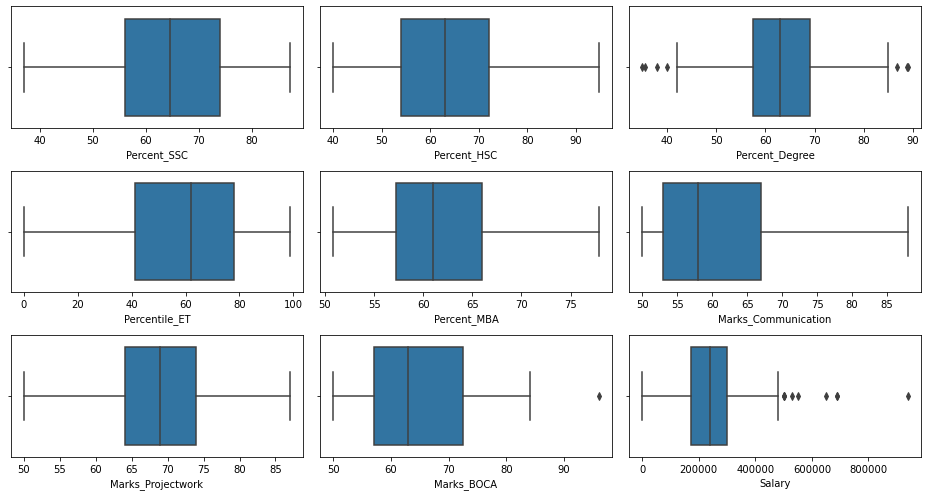

In [124]:
# outlier detection

plt.rcParams['figure.figsize'] = 13,7

fig, ax = plt.subplots(nrows= 3, ncols= 3)

for variable, subplot in zip(df.select_dtypes(np.number).columns, ax.flatten()):
    sns.boxplot(df[variable], ax = subplot)
    
plt.tight_layout()
plt.show()

In [125]:
df.skew()

Percent_SSC           -0.063271
Percent_HSC            0.291252
Percent_Degree         0.052679
Experience_Yrs         1.277817
Percentile_ET         -0.741718
Percent_MBA            0.341080
Marks_Communication    0.741454
Marks_Projectwork     -0.259735
Marks_BOCA             0.293126
Salary                 0.240575
dtype: float64

In [83]:
# there is no such skewness found with statistically or visually
# but in case skewness

'''
for var in df.select_dtypes(np.number).columns:
    if df[var].skew() > 1 or df[var].skew() < -1:
        df[var] = np.log1p(df[var])
        print('transformation done')
        '''

# or we can use IQR treatment

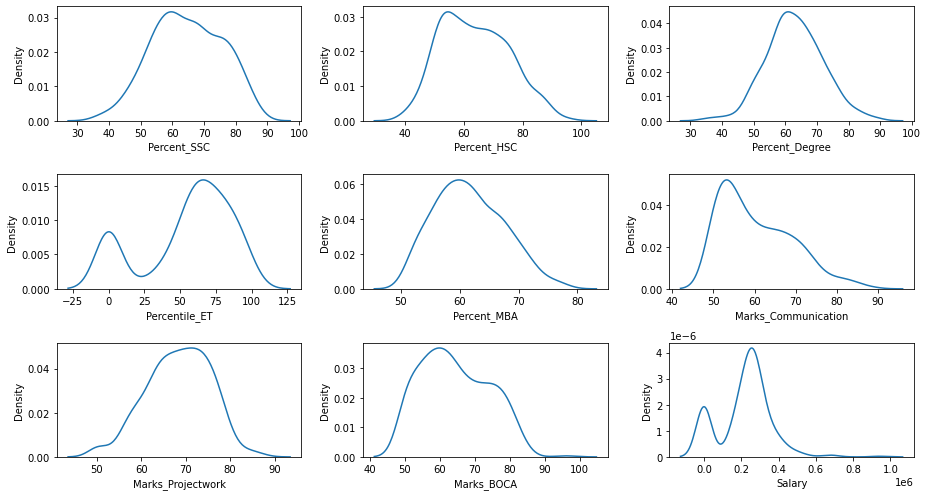

In [126]:
# distrbution of variables

plt.rcParams['figure.figsize'] = 13,7

fig, ax = plt.subplots(nrows= 3, ncols= 3)

for variable, subplot in zip(df.select_dtypes(np.number).columns, ax.flatten()):
    sns.kdeplot(df[variable], ax = subplot)
    
plt.tight_layout()
plt.show()

# make statement

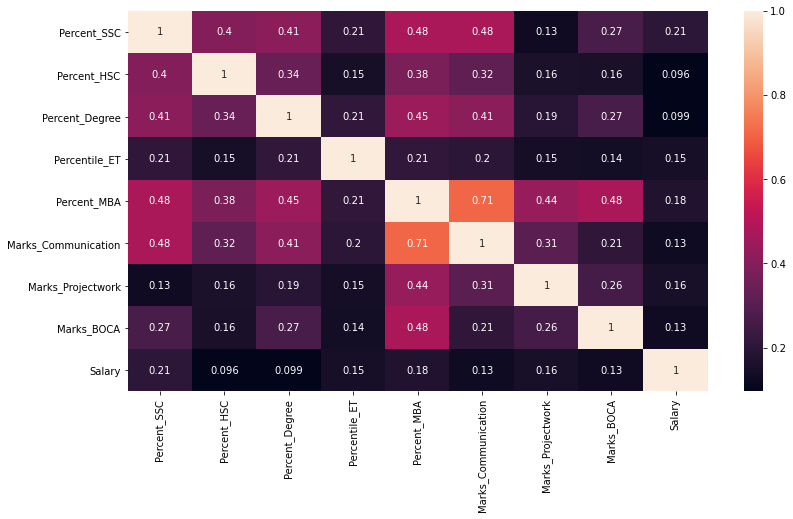

In [127]:
# taking Salary as a target

sns.heatmap(df.corr(), annot= True);

# all the independent variable are moderately affecting the target 
# but we have a strong correlation between two independent variable
# lets visualise them seperately

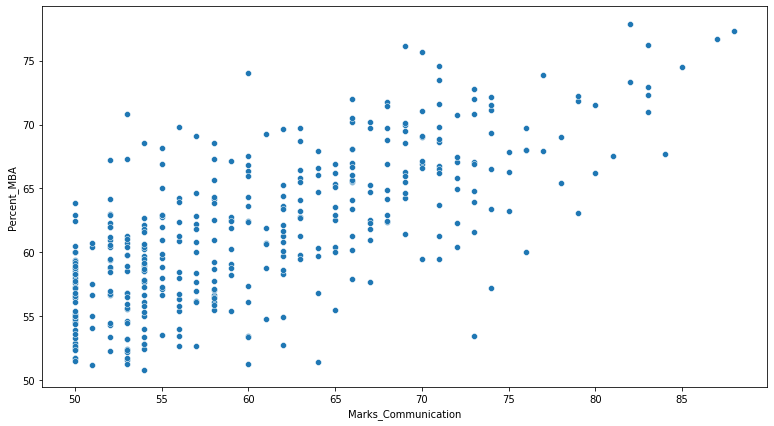

In [128]:
sns.scatterplot(x=df['Marks_Communication'], y = df['Percent_MBA']);

# becouse the communication skill is usefull and mandatery for the Mba domain

In [ ]:
# right now no need of dropping features

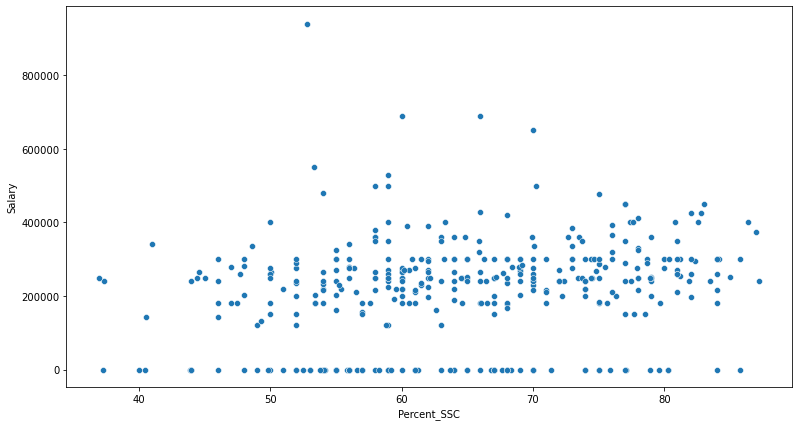

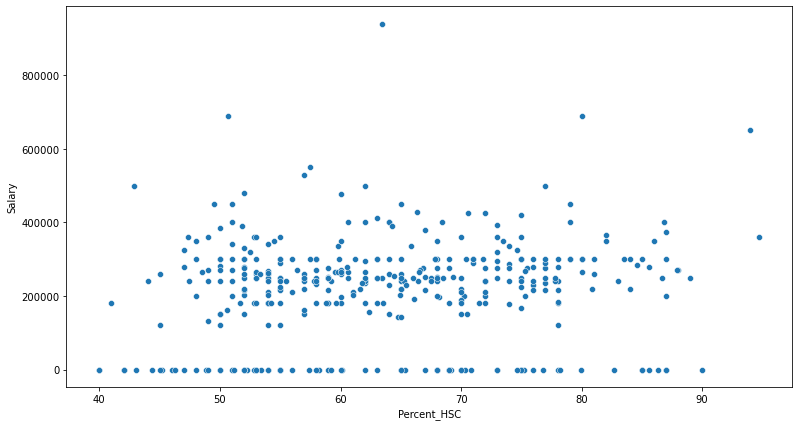

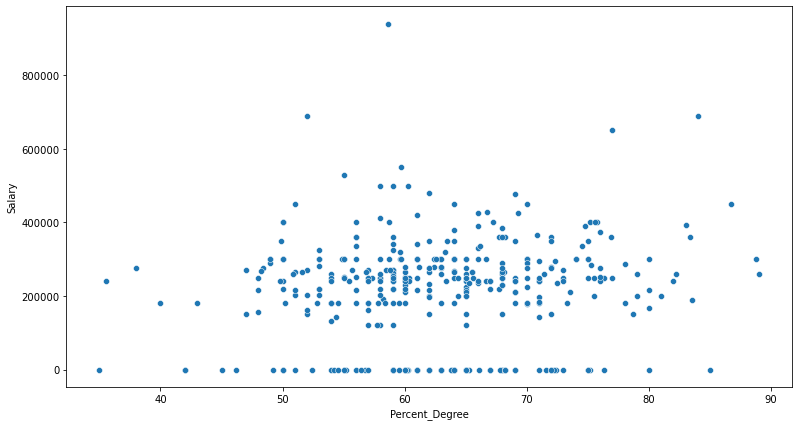

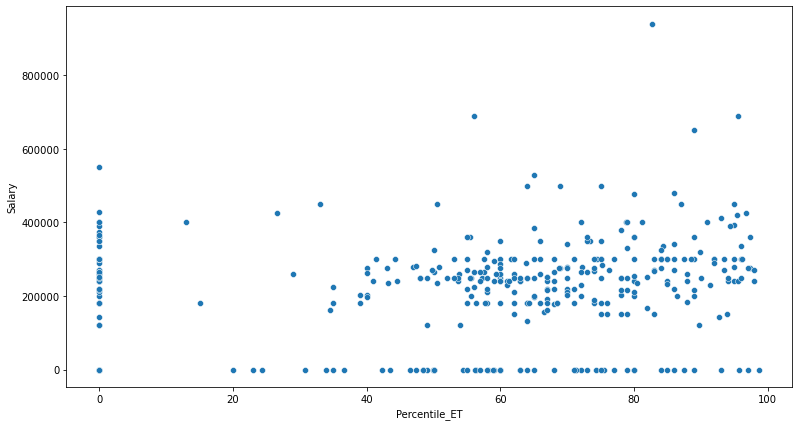

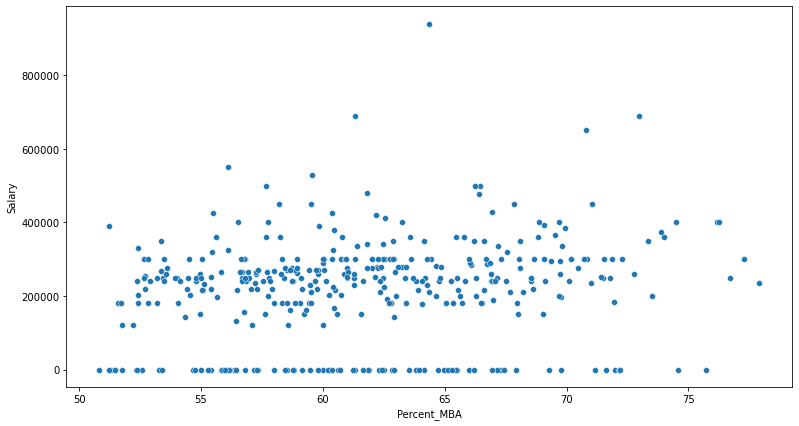

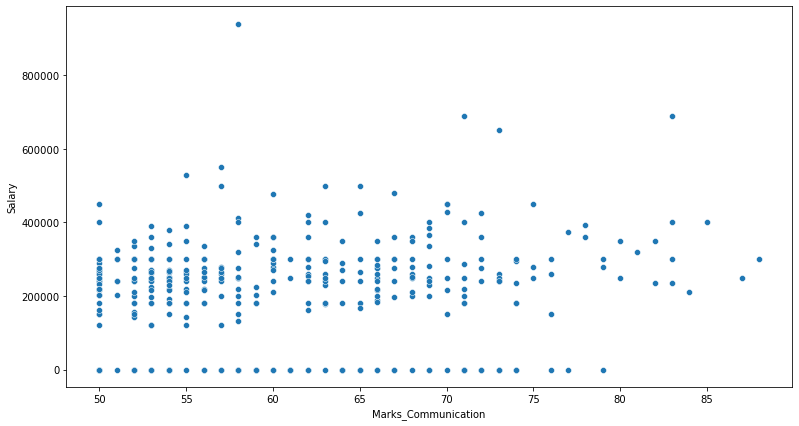

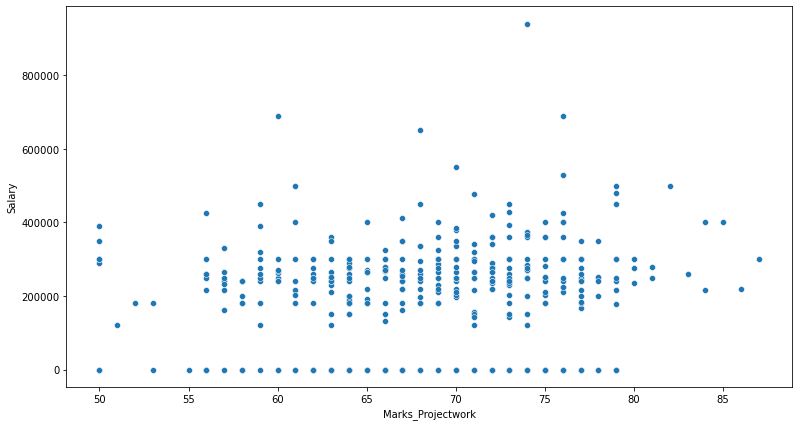

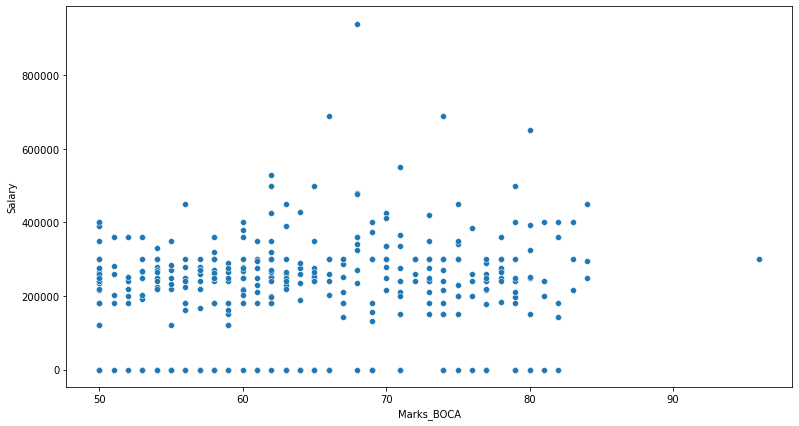

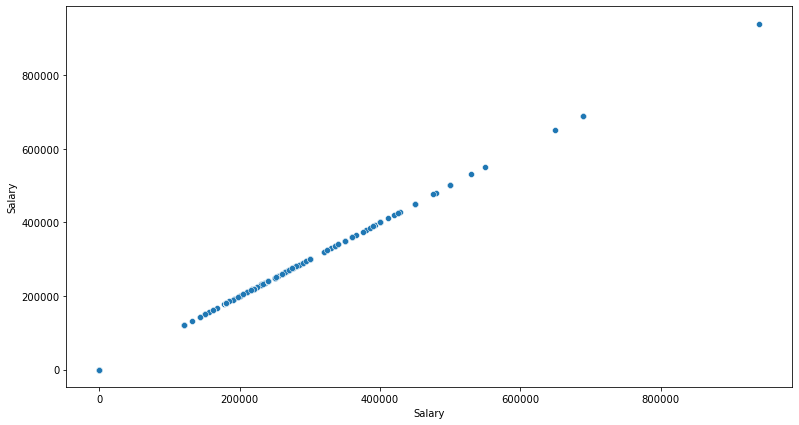

In [129]:
# relationship of indepandent variables to the target variables

for i in df.select_dtypes(np.number).columns:
    sns.scatterplot(x=df[i],y = df['Salary'])
    plt.show()

In [ ]:
# we can see less corelation to target variables
# so we can use poyunomial models to produce more variables by interaction of indepandance variables
# then to reduce curse of dimentionality we can rationalise the model
# or we can use transformation technique

In [130]:
X = df.drop('Salary', axis= 1)
y = df['Salary']

In [144]:
X_num = X.select_dtypes(np.number)
X_cat = X.select_dtypes(np.object)

In [142]:
# scaling the independent numerical variables
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_num = pd.DataFrame(ss.fit_transform(X_num), columns= X_num.columns)
X_num.shape

(391, 8)

In [145]:
X_cat = pd.get_dummies(X_cat, drop_first= True)
X_cat.shape

(391, 26)

In [147]:
X_final = pd.concat([X_num,X_cat], axis= 1)
X_final.shape

(391, 34)

In [102]:
# transforming dependent column
y = (y - y.mean())/y.std()
y.shape

(391,)

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y, random_state= 2, test_size= 0.30)

pd.concat([X_train, X_test]).shape

# by this we can say the split data is representative of the overall data

(391, 34)

In [ ]:
# now the preprocessing and data split is done
# we can go with the base model
# after checking the accuracy modify the parameters
# if the accuracy is not improving then apply hyperparameter tuning with gridsearchCV and randomisearchCV